## Theil-Sen Regression: The Robust Twin of Linear Regression

In [1]:
import warnings
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.linear_model import LinearRegression, TheilSenRegressor

sns.set()
warnings.filterwarnings('ignore')

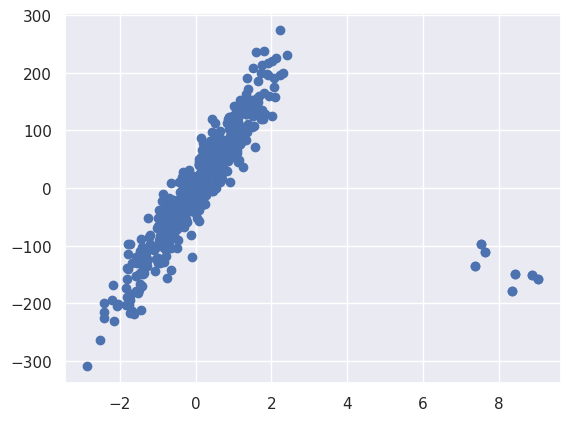

In [2]:
N_SAMPLES = 500
N_OUTLIERS = 7 

X, y, coef = datasets.make_regression(
    n_samples=N_SAMPLES,
    n_features=1,
    n_informative=1,
    noise=30,
    coef=True
)

coef_list = [["original_coef", float(coef)]]

outliers_x = 8 + 0.75 * np.random.normal(size=(N_OUTLIERS, 1))
outliers_y = -150 + 20 * np.random.normal(size=N_OUTLIERS)


X = np.concatenate((X, outliers_x, outliers_x))
y = np.concatenate((y, outliers_y, outliers_y))

plt.scatter(X, y)

In [3]:
lr = LinearRegression().fit(X, y)
coef_list.append(["linear_regression", lr.coef_[0]])

In [4]:
plotline_X = np.arange(X.min(), X.max()).reshape(-1, 1)

fit_df = pd.DataFrame(
    index = plotline_X.flatten(),
    data={"linear_regression": lr.predict(plotline_X)}
)

In [5]:
colors = ['#fe7c73', '#2471A3', '#3498DB', '#27AE60', '#82E0AA', '#D35400', '#5D6D7E', '#E74C3C', '#21618C', '#B7950B', '#46C7C7', '#00B9FF', '#FF7051', "orange", "darkorange", "tomato", "coral", "limegreen", "lightsalmon"]

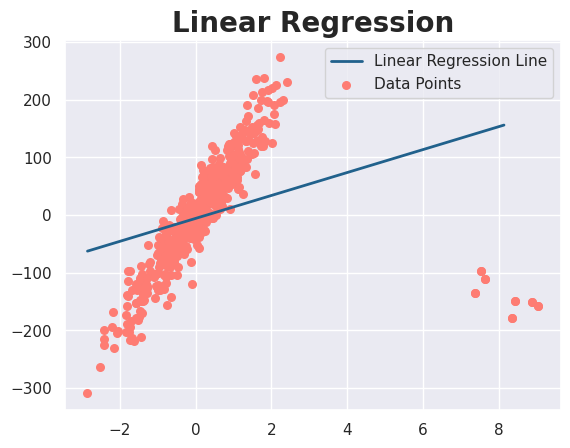

In [6]:
fix, ax = plt.subplots()
fit_df.plot(ax=ax, y = "linear_regression", c = colors[8], lw=2, label="Linear Regression Line")
plt.scatter(X, y, c = colors[0], s = 30,  label = "Data Points")
plt.legend()
plt.title("Linear Regression", fontsize=20, fontweight = "bold")
plt.show();

In [7]:
theilsen = TheilSenRegressor(random_state=42).fit(X, y)
fit_df["theilsen_regression"] = theilsen.predict(plotline_X)
coef_list.append(["theilsen_regression", theilsen.coef_[0]])

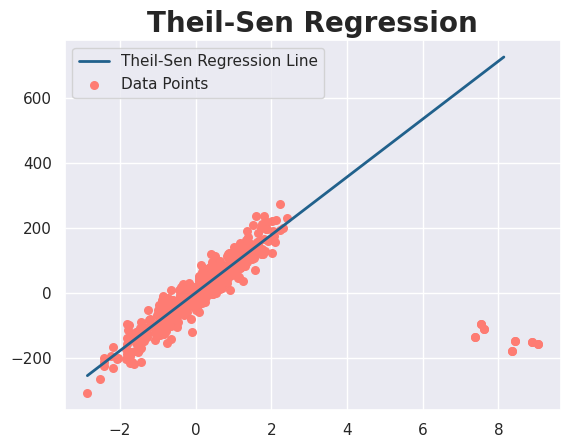

In [8]:
fix, ax = plt.subplots()
fit_df.plot(ax=ax, y = "theilsen_regression", c = colors[8], lw=2, label="Theil-Sen Regression Line")
plt.scatter(X, y, c = colors[0], s = 30, label = "Data Points")
plt.legend()
plt.title("Theil-Sen Regression", fontsize=20, fontweight = "bold")

plt.show();

## My View


Linear Regression is the most widely used ML algorithm.

But it is sensitive to outliers.

In fact, even a few outliers can significantly impact its performance.

Instead, try TheilSenRegressor. It is an outlier-robust regression algorithm.

It works as follows:
- Select a subset of data
- Fit a least squares model
- Record model weights
- Repeat

The final weights are the spatial median (or L1 Median) of all models.

```
The spatial median represents the “middle” or central location in a multidimensional space.

Essentially, the objective is to find a point in the same multidimensional space which minimizes the sum of the absolute differences between itself and all other points (weight vectors, in this case).
```

As shown above, while Linear Regression is influenced by outliers, Theil-Sen Regression isn't.

Having said that, it is always recommended to experiment with many robust methods and see which one fits your data best.

👉 Get started with Theil-Sen Estimator: [Sklearn Docs](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.TheilSenRegressor.html).